# Orden de convergencia
_**Modo de uso**_: una vez seleccionada la celda que contiene el código, pulsar May+Intro

Nombre del archivo CSV para e(n):  aitken.csv
Nombre del archivo CSV para e(n+1):  
Raíz:  (-5+3*np.sqrt(3))/2
Nombre de la imagen (con extensión, ejemplo: archivo.png):  convergencia_aitken_alfa.png


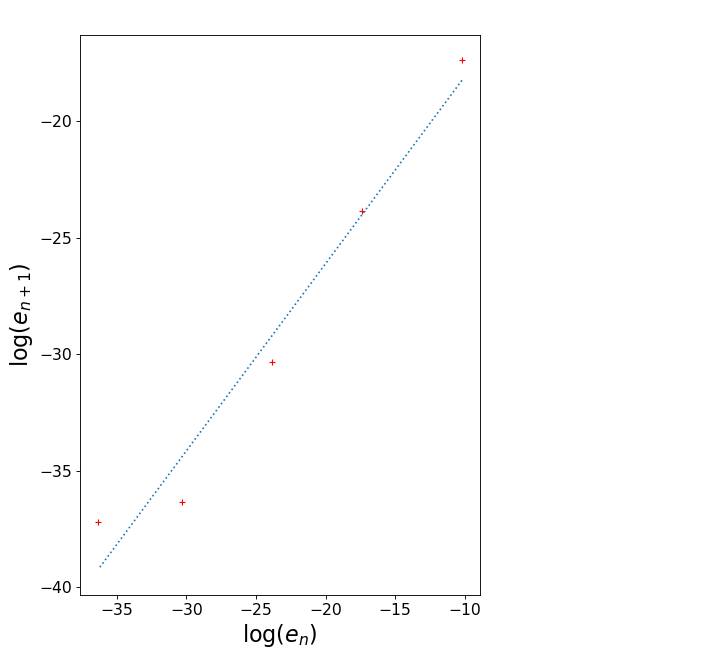

La pendiente de la recta es: **0.8032099408152886** por tanto la convergencia es: **1.0**

In [3]:
#################
# Importaciones #
#################

import numpy as np
import sympy as sp
import pandas as pd
import csv
from IPython.display import Math, Latex, Markdown
from pylab import *
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import math
import warnings
warnings.filterwarnings("ignore")

##################################
##################################
## 1.- Preparación de los datos ##
##################################
##################################

###########################################
# Declaración de algunas variables útiles #
###########################################

orden_matrix = []
en_matrix = []
en1_matrix = []
datos_n1_matrix = []
datos_n_matrix = []
##########################################################################
# Definición de la función                                               #
#                                                                        #
# El método utilizado está basado en :                                   #
# --> p: orden de convergencia                                           #
# --> e(n): error término n                                              #
#                                                                        #
#    e(n+1) = k*(e(n))^p                                                 #
#    log(e(n+1)) = p*log(e(n)) +log(k)                                   #
#                                                                        #
# siendo p la pendiente de la recta resultante                           #
##########################################################################

def orden(terminos_n, terminos_n1, raiz):
    """
    Cálculo del orden de convergencia de una sucesión
    :param terminos: matriz que contiene los términos de la sucesión
    :param raiz: solución analítica o valor aproximado representando por un término
    de la sucesión con un índice adecadamente alto.
    """
    i = 0
    while i < len(terminos_n1):
        en_matrix.append( np.log(abs(terminos_n[i]-raiz)))
        en1_matrix.append(np.log(abs(terminos_n1[i]-raiz)))
        i +=1

narchivo_en = input("Nombre del archivo CSV para e(n): ") # Nombre del archivo csv que contiene los datos
narchivo_en1 = input("Nombre del archivo CSV para e(n+1): ")
# Se contempla el caso de que solo haya un archivo de datos
if narchivo_en1 == '':
    vacio = True
    narchivo_en1 = narchivo_en

mraiz = eval(input("Raíz: ")) # Raíz
archivo_en = open(narchivo_en)
archivo_en1 = open(narchivo_en1)

datos_csv_n = np.genfromtxt(archivo_en, delimiter=',') # Obtención de los datos del archivo csv
datos_csv_n1 = np.genfromtxt(archivo_en1, delimiter=',')

# Almacenamiento de los datos en una matriz
for fila in datos_csv_n:
    datos_n_matrix.append(fila) 
    # Se contempla el caso de que solo haya un archivo de datos
    if vacio :
        datos_n1_matrix = np.delete(datos_csv_n1, 0, 0)
    else:
        for fila in datos_csv_n1:
            datos_n1_matrix.append(fila)
    
orden(datos_n_matrix, datos_n1_matrix, mraiz) # Llamada a la función

#################################################
#################################################
## 2.- Dibujo de gráfica y de regresión lineal ##
#################################################
#################################################

plt.rcParams.update({'font.size': 14}) # Ajuste general del tamaño de fuente

p = np.polyfit(en_matrix, en1_matrix, 1) # Regresión lineal

y_ajuste = []
j=0

# Preparación de la matriz para contener los datos del eje y de la gráfica
while j < len(en_matrix):
    y_ajuste.append(en_matrix[j]*p[0]+p[1])
    j += 1

# Nombre del fichero para guardar el gráfico
guardar_como = input('Nombre de la imagen (con extensión, ejemplo: archivo.png): ')

# Gráfica
fig=plt.figure(figsize=(5, 7), dpi= 80, facecolor='w', edgecolor='k')

etiqueta = '$\\alpha={}$'.format(p[0])

ax=fig.add_axes([0,0,1,1])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$\\log(e_n)$', fontsize= 20)
plt.ylabel('$\\log(e_{n+1})$', fontsize= 20)

ax.plot(en_matrix, en1_matrix, 'r+')
ax.plot(en_matrix, y_ajuste, ':')
ax.annotate(etiqueta, [-7, -15.7], bbox=dict(boxstyle="round", fc="w"))
plt.show()

fig.savefig(guardar_como,bbox_inches='tight') # Guardado de la gráfica en disco

display(Markdown('La pendiente de la recta es: **{}** por tanto la convergencia es: **{}**'.format(p[0], np.round(p[0]))))
#display(datos_n_matrix)
#display(datos_n1_matrix)